# National Parks Service

Data analysis on the conservation statuses of these species and explore if there are any patterns or themes to the types of species that become endangered. 

### *species_info.csv:* contains data about different species and their conservation status
* `category` - class of animal
* `scientific_name` - the scientific name of each species
* `common_name` - the common names of each species
* `conservation_status` - each species’ current conservation status

### *observations.csv:* holds recorded sightings of different species at several national parks for the past 7 days.
* `scientific_name` - the scientific name of each species
* `park_name` - Park where species were found
* `observations` - the number of times each species was observed at park

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_obs = pd.read_csv("observations.csv", encoding='utf-8')
df_spe = pd.read_csv("species_info.csv", encoding='utf-8')

-----------------------
## Data analysis - Species file

In [3]:
df_spe.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
df_spe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
print("Total animal category: {}".format(len(df_spe.category.unique())))
print("Category: {}".format(df_spe.category.unique()))
print("Total unique scientific name: {}".format(len(df_spe.scientific_name.unique())))
print("Total unique common names: {}".format(len(df_spe.common_names.unique())))
print("Conservation status: {}".format(df_spe.conservation_status.dropna().unique()))

Total animal category: 7
Category: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
Total unique scientific name: 5541
Total unique common names: 5504
Conservation status: ['Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Under the [Endangered Species Act (ESA)](https://www.fisheries.noaa.gov/national/endangered-species-conservation/endangered-species-act), plant and animal species may be listed as either *endangered* or *threatened*. *“Endangered”* means a species is in danger of extinction throughout all or a significant portion of its range. *“Threatened”* means a species is likely to become endangered within the foreseeable future.'

-------------------
## Data analysis - Observations file

In [6]:
df_obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [7]:
df_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [8]:

print("Total unique scientific name: {}".format(len(df_obs.scientific_name.unique())))
print("Total unique park name: {}".format(len(df_obs.park_name.unique())))
print("Park name: {}".format(df_obs.park_name.unique()))
print("Observation min.: {}".format(df_obs.observations.min()))
print("Observation max.: {}".format(df_obs.observations.max()))
print("Observation mean.: {}".format(round(df_obs.observations.mean())))


Total unique scientific name: 5541
Total unique park name: 4
Park name: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Observation min.: 9
Observation max.: 321
Observation mean.: 142


## Distributions

In [9]:
sns.set_style("whitegrid")
sns.set(style="ticks")
plt.rcParams['font.size'] = 10

In [10]:
df_merge = df_spe.merge(df_obs, 
                        on="scientific_name",
                        how="left"
)
df_merge.dropna(inplace=True)

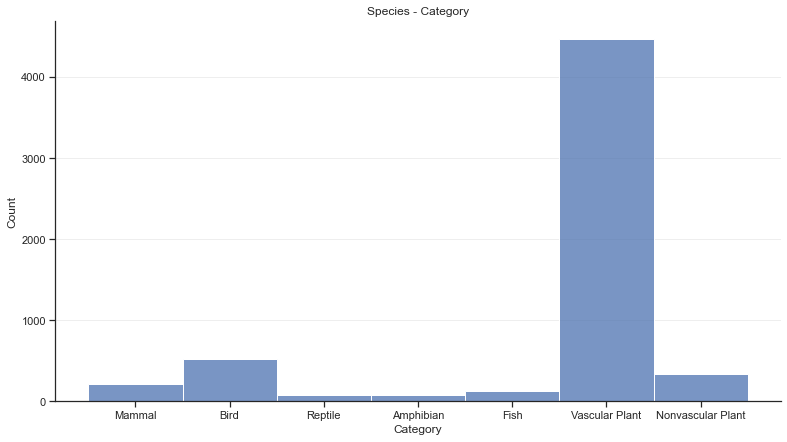

In [11]:
plt.figure(figsize=(13,7))
sns.histplot(data=df_spe, x="category")
plt.grid(color="#EEEEEE")
plt.grid(False, axis="x")
plt.title("Species - Category")
plt.xlabel("Category")
sns.despine(left=False, bottom=False)
plt.show()

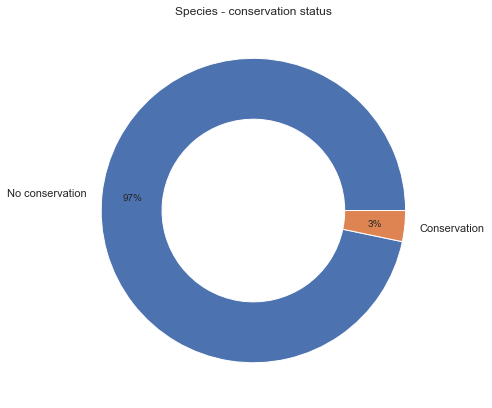

In [12]:
tot_na = df_spe.conservation_status\
            .isna()\
            .value_counts()\
            .to_list()
            
fig, ax = plt.subplots()
size = 0.4

ax.figure.set_size_inches(7,7)
ax.pie(tot_na, 
       radius=1,
       autopct='%1.0f%%',
       pctdistance=0.8,
       labels=["No conservation", "Conservation"],
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title="Species - conservation status")
plt.show()

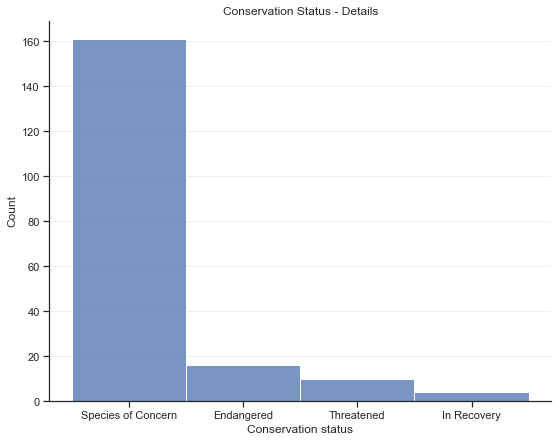

In [13]:
plt.figure(figsize=(9,7))
sns.histplot(data=df_spe.dropna(), x="conservation_status")
plt.grid(color="#EEEEEE")
plt.grid(False, axis="x")
plt.title("Conservation Status - Details")
plt.xlabel("Conservation status")
sns.despine(left=False, bottom=False)
plt.show()

------------------------------------------------------
## Conservation status

In [14]:
status_conserv = df_spe.groupby(["conservation_status", "category"])\
                    ["scientific_name"]\
                    .count()\
                    .unstack()\
                    .reset_index()
status_conserv

category,conservation_status,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
0,Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
1,In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
2,Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
3,Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


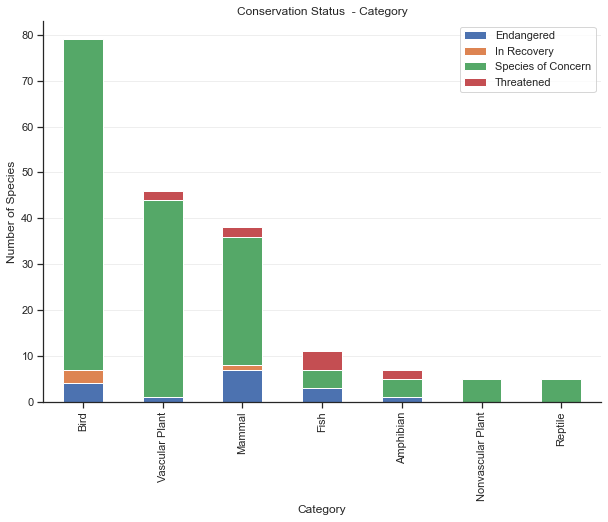

In [15]:
status_conserv.reindex(status_conserv.set_index('conservation_status')\
                .sum()\
                .sort_values(ascending=False)\
                .index, axis=1)\
                .T.plot(kind='bar', 
                        stacked=True, 
                        figsize=(10,7))
plt.grid(color="#EEEEEE")
plt.grid(False, axis="x")
plt.title("Conservation Status  - Category")
plt.legend(status_conserv.conservation_status)
plt.xlabel("Category")
plt.ylabel("Number of Species")
sns.despine(left=False, bottom=False)
plt.show()

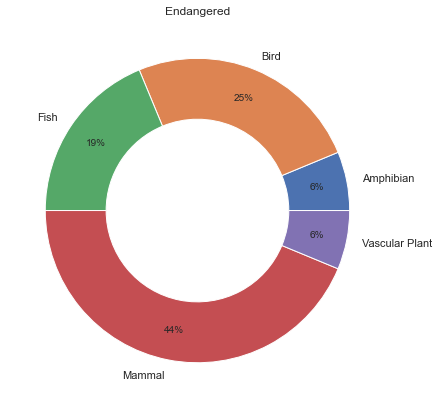

In [16]:
status = "Endangered"
data = status_conserv[status_conserv.conservation_status == status]\
              .dropna(axis=1)

fig, ax = plt.subplots()
size = 0.4
nums = np.array(data)[0,1:10]
labels = data.columns[1:]

ax.figure.set_size_inches(7,7)
ax.pie(nums, 
       radius=1, 
       autopct='%1.0f%%',
       pctdistance=0.8, 
       labels=labels,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title=status)
plt.show()

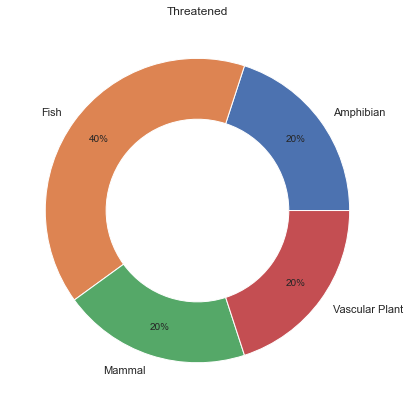

In [17]:
status = "Threatened"
data = status_conserv[status_conserv.conservation_status == status]\
              .dropna(axis=1)

fig, ax = plt.subplots()
size = 0.4
nums = np.array(data)[0,1:10]
labels = data.columns[1:]

ax.figure.set_size_inches(7,7)
ax.pie(nums, 
       radius=1, 
       labels=labels,
       autopct='%1.0f%%',
       pctdistance=0.8,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title=status)
plt.show()

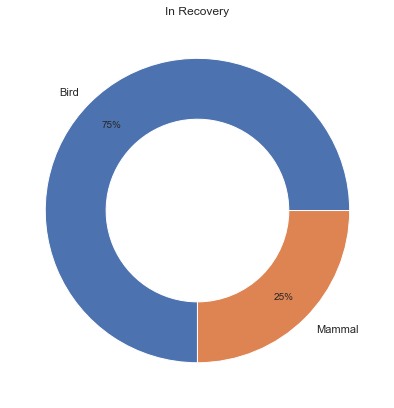

In [18]:
status = "In Recovery"
data = status_conserv[status_conserv.conservation_status == status]\
              .dropna(axis=1)

fig, ax = plt.subplots()
size = 0.4
nums = np.array(data)[0,1:10]
labels = data.columns[1:]

ax.figure.set_size_inches(7,7)
ax.pie(nums, 
       radius=1, 
       labels=labels,
       autopct='%1.0f%%',
       pctdistance=0.8,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title=status)
plt.show()

In [19]:
text_ext = df_spe.common_names.str.findall(r'[a-zA-Z\'-][a-zA-Z0-9\'-]*')

list_word = []
for elem in text_ext:
    set_l = set(elem)
    dm = ""
    i = 0
    for word in set_l:
        if i < 3:
            dm += word + " "
            i += 1
    list_word.append(dm[:-1])
    
df_spe["common_names_fix"] = list_word

In [27]:
common_name_dict = {}
n=0
for elem in df_spe.scientific_name:
    common_name_dict[elem] = [df_spe.common_names_fix.loc[n], df_spe.category.loc[n]]
    n += 1

In [38]:
df_obs["common_names_fix"] = df_obs.scientific_name.apply(lambda x: common_name_dict[x][0])
df_obs["category"] = df_obs.scientific_name.apply(lambda x: common_name_dict[x][1])
df_obs["category"] = df_obs.category.apply(lambda x: "Plant" if x.find("Plant") >= 0 else x)

--------------------
## Endangered & Threatened

In [45]:
endan_threat = df_spe[(df_spe.conservation_status == "Endangered") |
                    (df_spe.conservation_status == "Threatened")]
s_name = endan_threat.common_names_fix.to_list()
endan_threat_obs = df_obs[df_obs.common_names_fix.isin(s_name)]

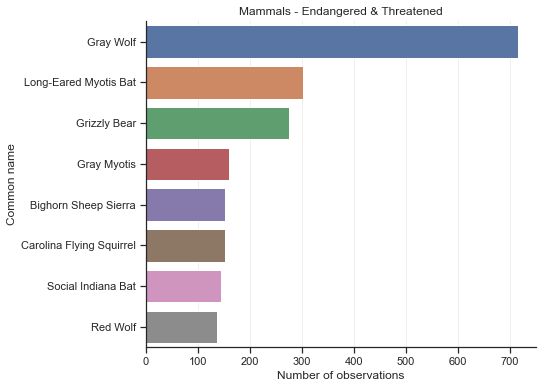

In [53]:
data = endan_threat_obs[endan_threat_obs.category == "Mammal"]\
            .groupby("common_names_fix")\
            .observations.sum()\
            .to_frame()\
            .sort_values("observations", ascending=False)
            
plt.figure(figsize=(7,6))
sns.barplot(y=data.index, x=data.observations)
plt.grid(color="#EEEEEE")
plt.grid(False, axis="y")
plt.title("Mammals - Endangered & Threatened")
plt.ylabel("Common name")
plt.xlabel("Number of observations")

sns.despine(left=False, bottom=False)
plt.show()

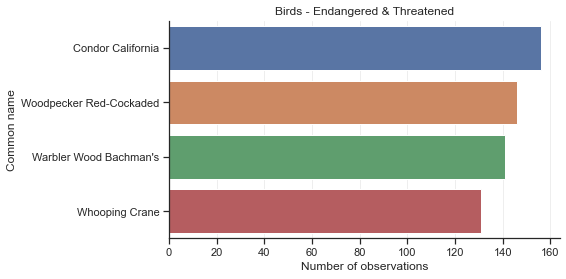

In [55]:
data = endan_threat_obs[endan_threat_obs.category == "Bird"]\
            .groupby("common_names_fix")\
            .observations.sum()\
            .to_frame()\
            .sort_values("observations", ascending=False)
            
plt.figure(figsize=(7,4))
sns.barplot(y=data.index, x=data.observations)
plt.grid(color="#EEEEEE")
plt.grid(False, axis="y")
plt.title("Birds - Endangered & Threatened")
plt.ylabel("Common name")
plt.xlabel("Number of observations")

sns.despine(left=False, bottom=False)
plt.show()

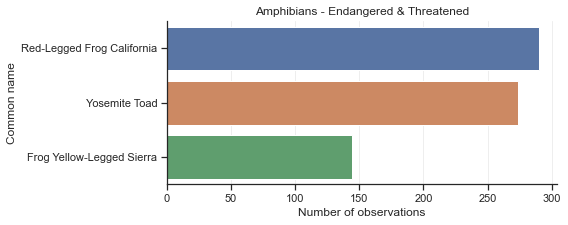

In [63]:
data = endan_threat_obs[endan_threat_obs.category == "Amphibian"]\
            .groupby("common_names_fix")\
            .observations.sum()\
            .to_frame()\
            .sort_values("observations", ascending=False)
            
plt.figure(figsize=(7,3))
sns.barplot(y=data.index, x=data.observations)
plt.grid(color="#EEEEEE")
plt.grid(False, axis="y")
plt.title("Amphibians - Endangered & Threatened")
plt.ylabel("Common name")
plt.xlabel("Number of observations")

sns.despine(left=False, bottom=False)
plt.show()

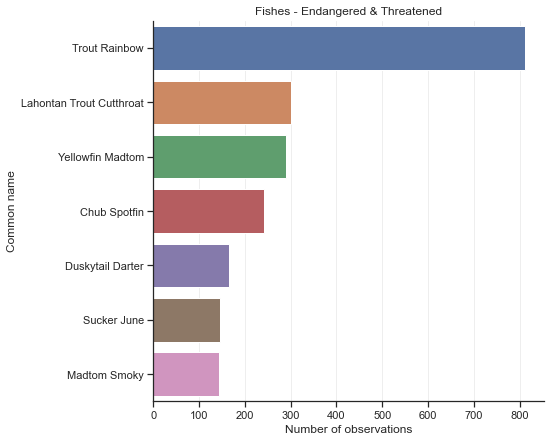

In [68]:
data = endan_threat_obs[endan_threat_obs.category == "Fish"]\
            .groupby("common_names_fix")\
            .observations.sum()\
            .to_frame()\
            .sort_values("observations", ascending=False)
            
plt.figure(figsize=(7,7))
sns.barplot(y=data.index, x=data.observations)
plt.grid(color="#EEEEEE")
plt.grid(False, axis="y")
plt.title("Fishes - Endangered & Threatened")
plt.ylabel("Common name")
plt.xlabel("Number of observations")

sns.despine(left=False, bottom=False)
plt.show()

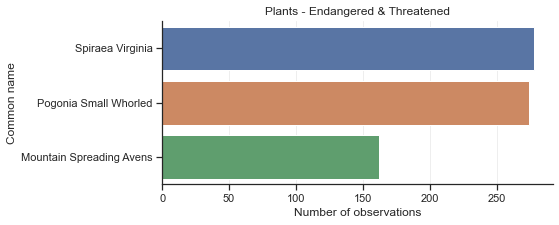

In [70]:
data = endan_threat_obs[endan_threat_obs.category == "Plant"]\
            .groupby("common_names_fix")\
            .observations.sum()\
            .to_frame()\
            .sort_values("observations", ascending=False)
            
plt.figure(figsize=(7,3))
sns.barplot(y=data.index, x=data.observations)
plt.grid(color="#EEEEEE")
plt.grid(False, axis="y")
plt.title("Plants - Endangered & Threatened")
plt.ylabel("Common name")
plt.xlabel("Number of observations")

sns.despine(left=False, bottom=False)
plt.show()

--------------------
## Species of Concern

In [71]:
spe_concern = df_spe[df_spe.conservation_status == "Species of Concern"]
s_name = spe_concern.common_names_fix.to_list()
spe_concern_obs = df_obs[df_obs.common_names_fix.isin(s_name)]

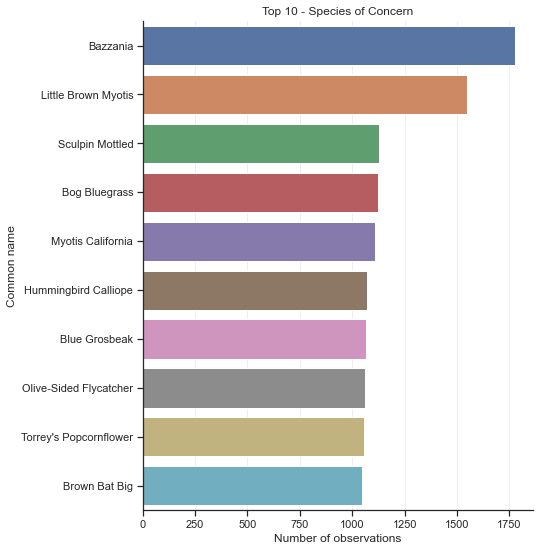

In [87]:
data = spe_concern_obs.groupby("common_names_fix")\
            .observations.sum()\
            .to_frame()\
            .sort_values("observations", ascending=False)\
            .head(10)
            
plt.figure(figsize=(7,9))
sns.barplot(y=data.index, x=data.observations)
plt.grid(color="#EEEEEE")
plt.grid(False, axis="y")
plt.title("Top 10 - Species of Concern")
plt.ylabel("Common name")
plt.xlabel("Number of observations")

sns.despine(left=False, bottom=False)
plt.show()

--------------------
## In Recovery

In [85]:
spe_inrecov = df_spe[df_spe.conservation_status == "In Recovery"]
s_name = spe_inrecov.common_names_fix.to_list()
spe_inrecov_obs = df_obs[df_obs.common_names_fix.isin(s_name)]

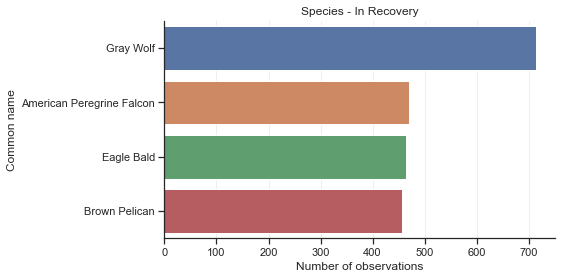

In [89]:
data = spe_inrecov_obs.groupby("common_names_fix")\
            .observations.sum()\
            .to_frame()\
            .sort_values("observations", ascending=False)
                        
plt.figure(figsize=(7,4))
sns.barplot(y=data.index, x=data.observations)
plt.grid(color="#EEEEEE")
plt.grid(False, axis="y")
plt.title("Species - In Recovery")
plt.ylabel("Common name")
plt.xlabel("Number of observations")

sns.despine(left=False, bottom=False)
plt.show()